# User Overview Analysis

### Import Libraries and Modules

In [8]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the src directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.insert(0, src_dir)

if 'data_loader' in sys.modules:
    del sys.modules['data_loader']
if 'user_experience' in sys.modules:
    del sys.modules['user_experience']

from data_loader import DataLoader
from user_experience import UserExperience



### Load Data from PostgreSQL and create UserExperience Object

In [9]:
loader = DataLoader()
df = loader.load_data("SELECT * FROM public.xdr_data")

cleaned_df = loader.clean_data(df)

df = cleaned_df

user_experience = UserExperience(df)

### Aggregates for User Experience Metrics


In [10]:
# Aggregate metrics
agg_metrics = user_experience.aggregate_metrics()
print(agg_metrics.head())

   MSISDN/Number  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0   3.360100e+10                 2.088418e+07                766247.496104   
1   3.360100e+10                 2.088418e+07                766247.496104   
2   3.360100e+10                 2.088418e+07                766247.496104   
3   3.360101e+10                 1.066000e+03                766247.496104   
4   3.360101e+10                 3.023381e+07                787449.496104   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0        46.000000         0.000000                     37.0   
1        30.000000         1.000000                     48.0   
2       108.224741        17.637235                     48.0   
3        69.000000        15.000000                    204.0   
4        57.000000         2.500000                  20197.5   

   Avg Bearer TP UL (kbps)                    Handset Type  
0                     39.0  Huawei P20 Lite Huawei Nova 3E  
1                     51

### TCP, RTT, Throughtput | Top, Bottom, Frequent 10

e:\Studies\tenx\w2\src\user_experience.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(extremes['most_frequent'], rotation=45)


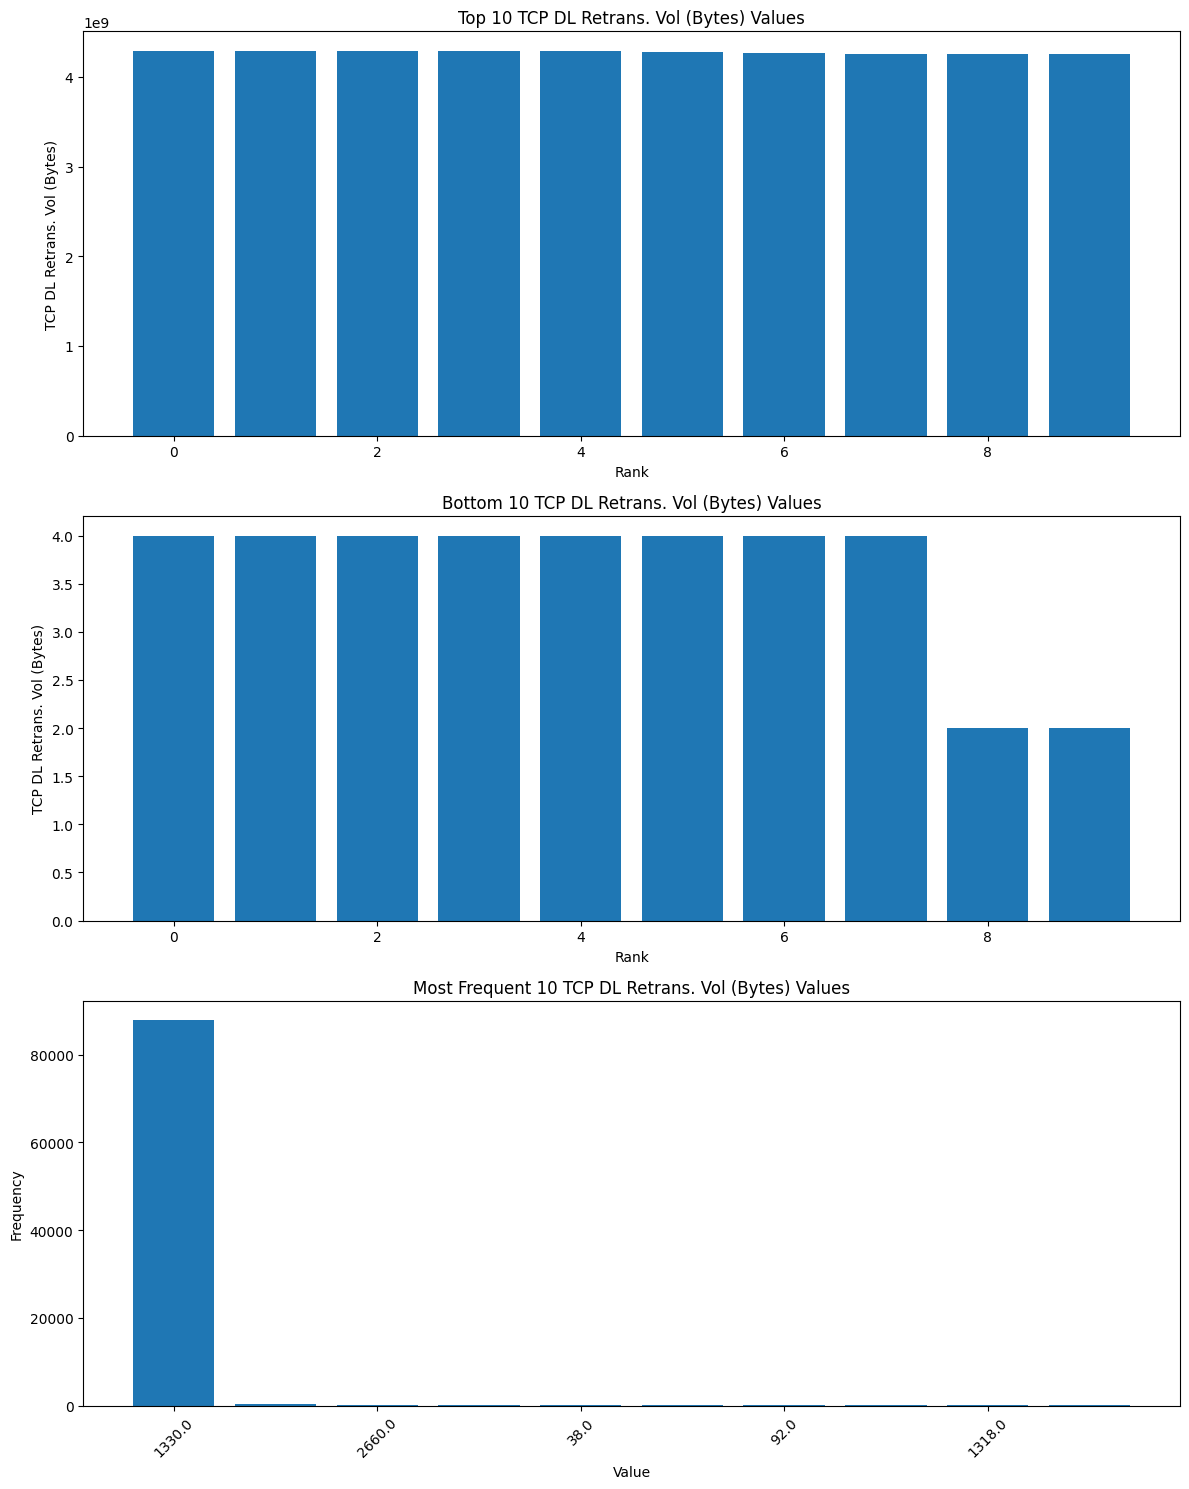

e:\Studies\tenx\w2\src\user_experience.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(extremes['most_frequent'], rotation=45)


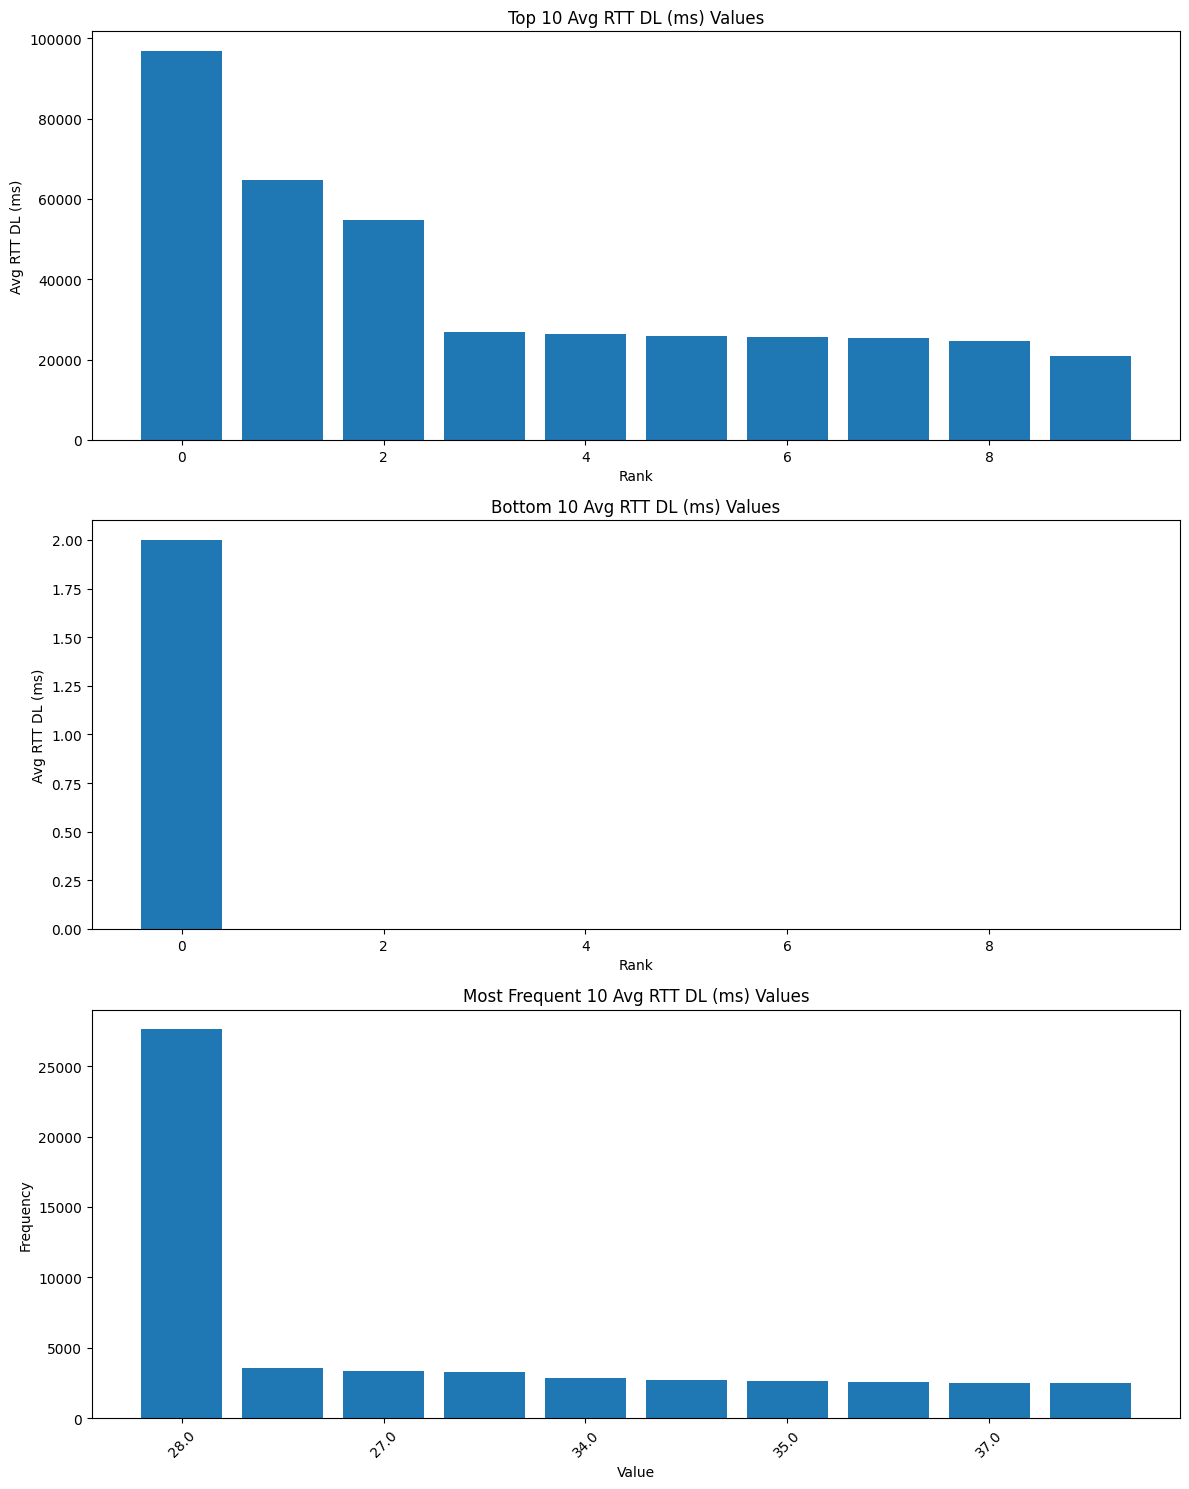

e:\Studies\tenx\w2\src\user_experience.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(extremes['most_frequent'], rotation=45)


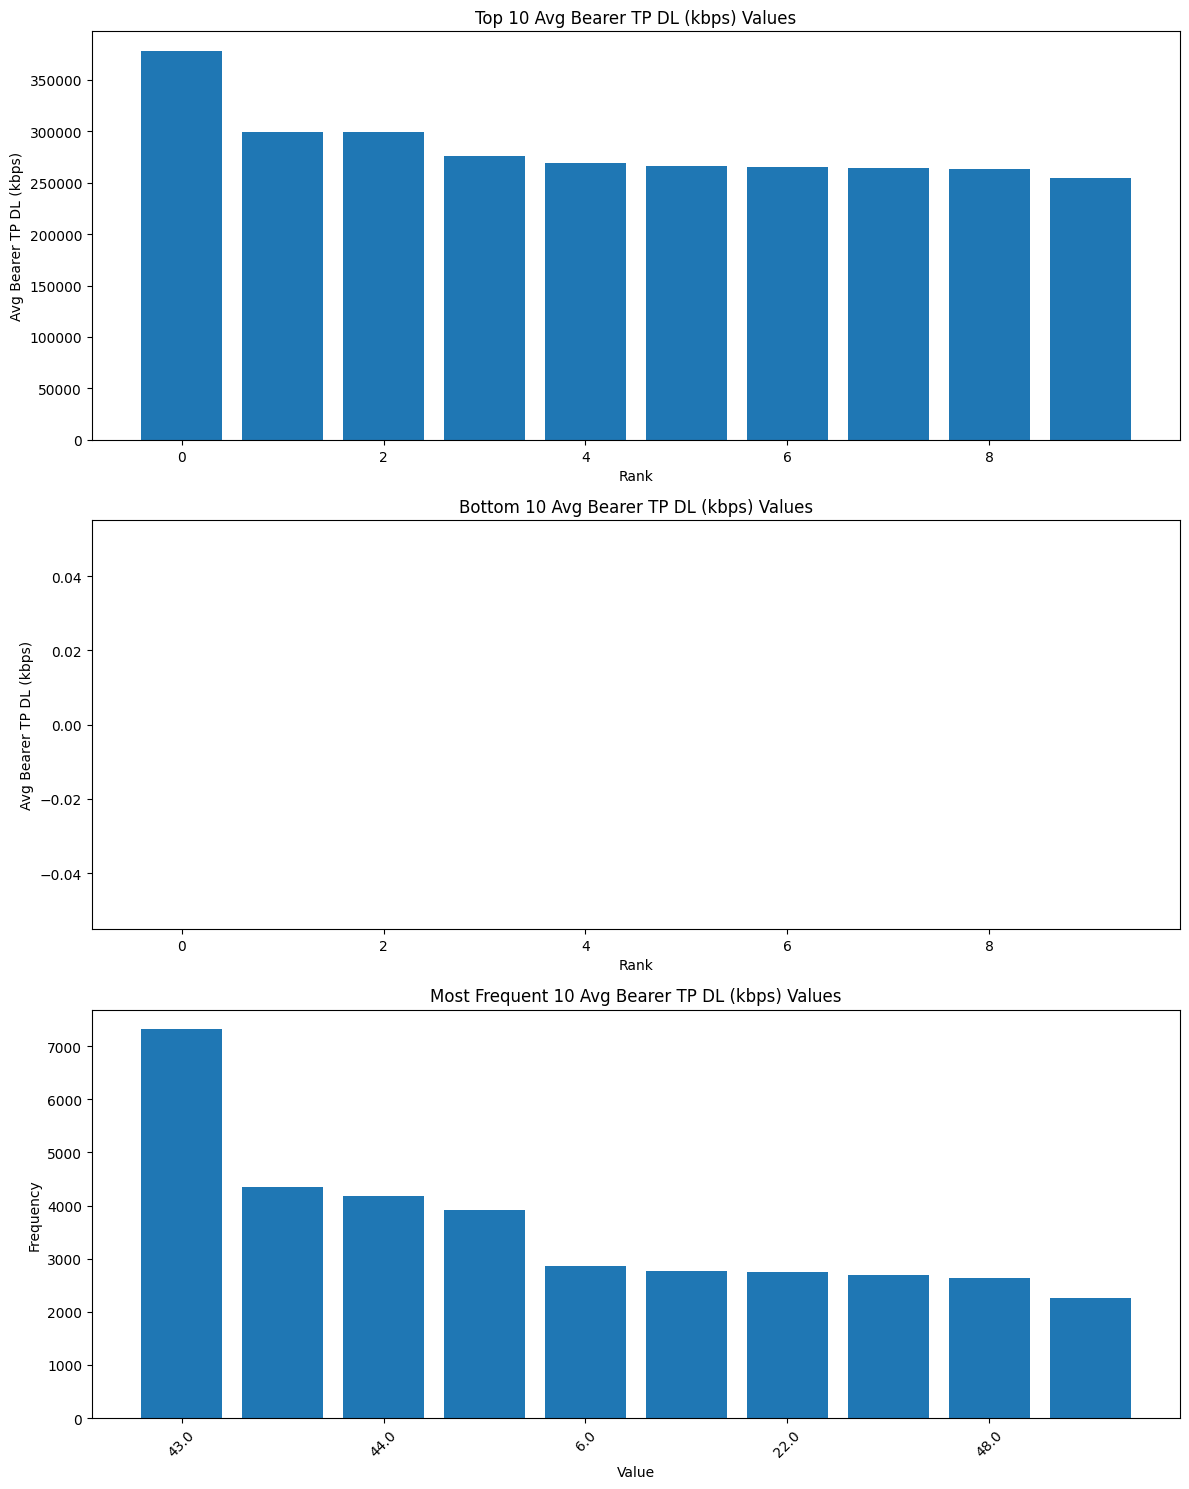

In [11]:
# Analyze and plot metric extremes
for metric in ['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)']:
    user_experience.plot_metric_extremes(metric)

### Throughput, TCP averages per Handset | for top 10 handsets

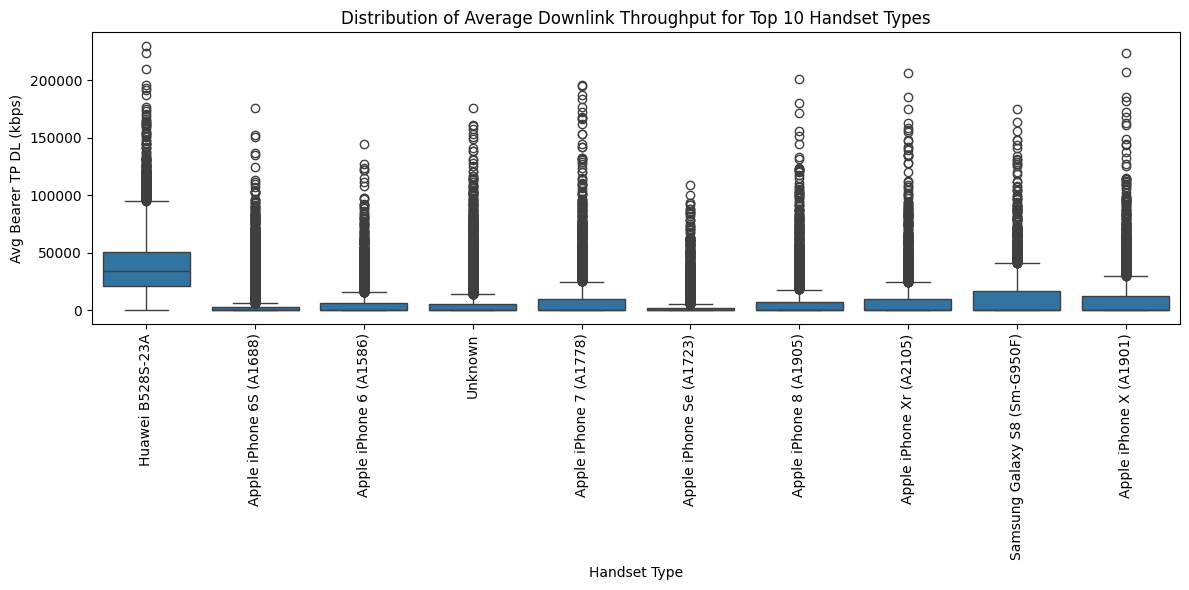

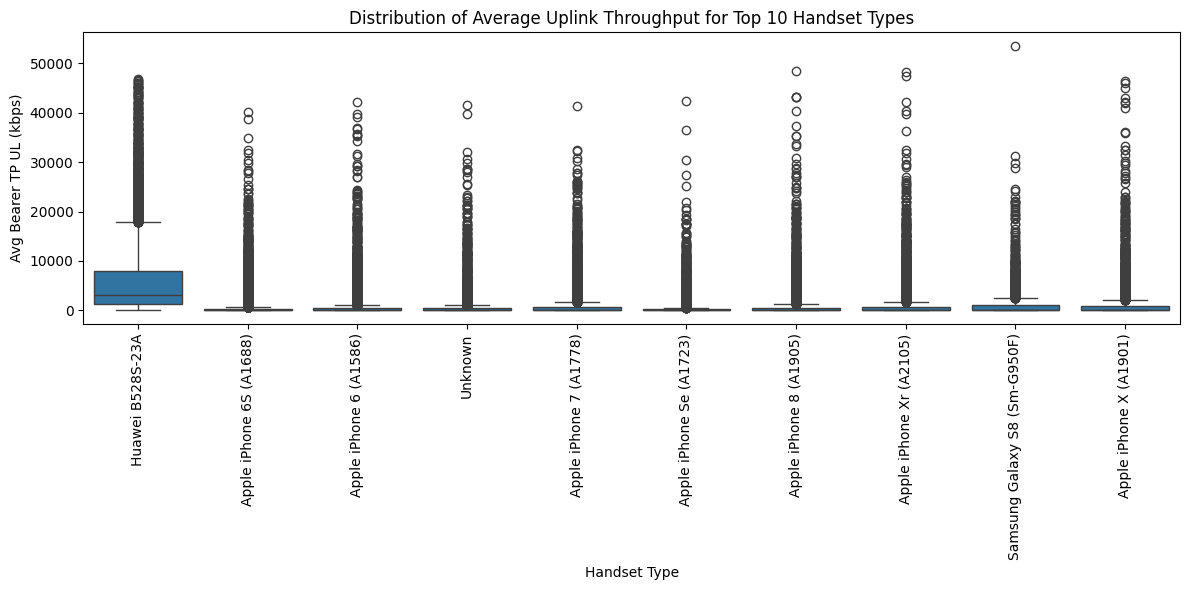

In [12]:
# Plot throughput distribution
user_experience.plot_throughput_distribution()


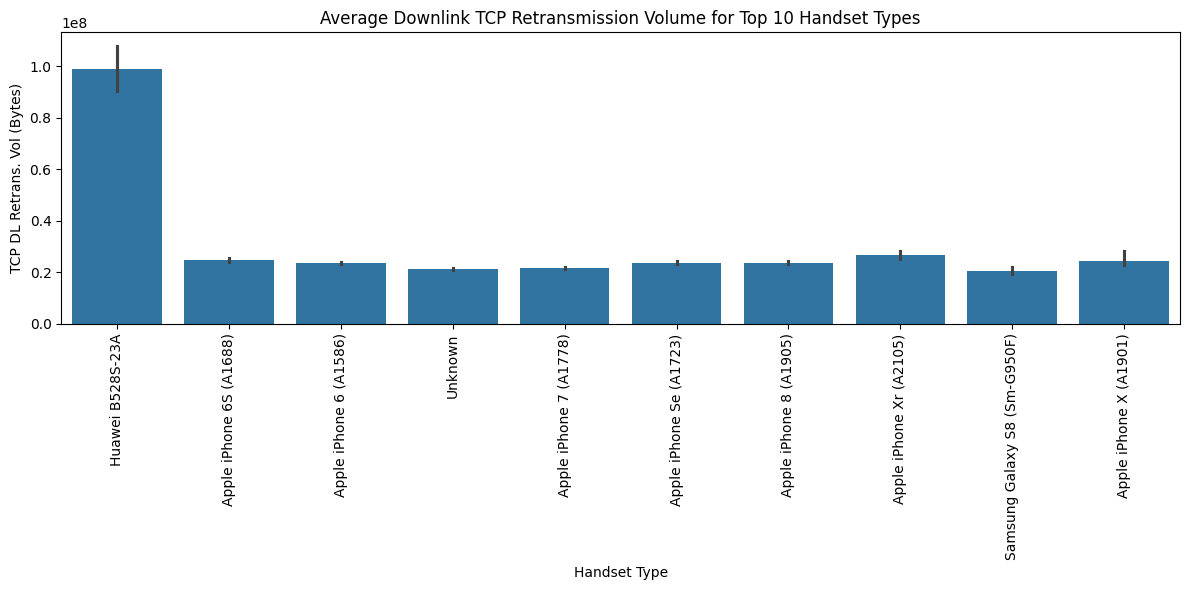

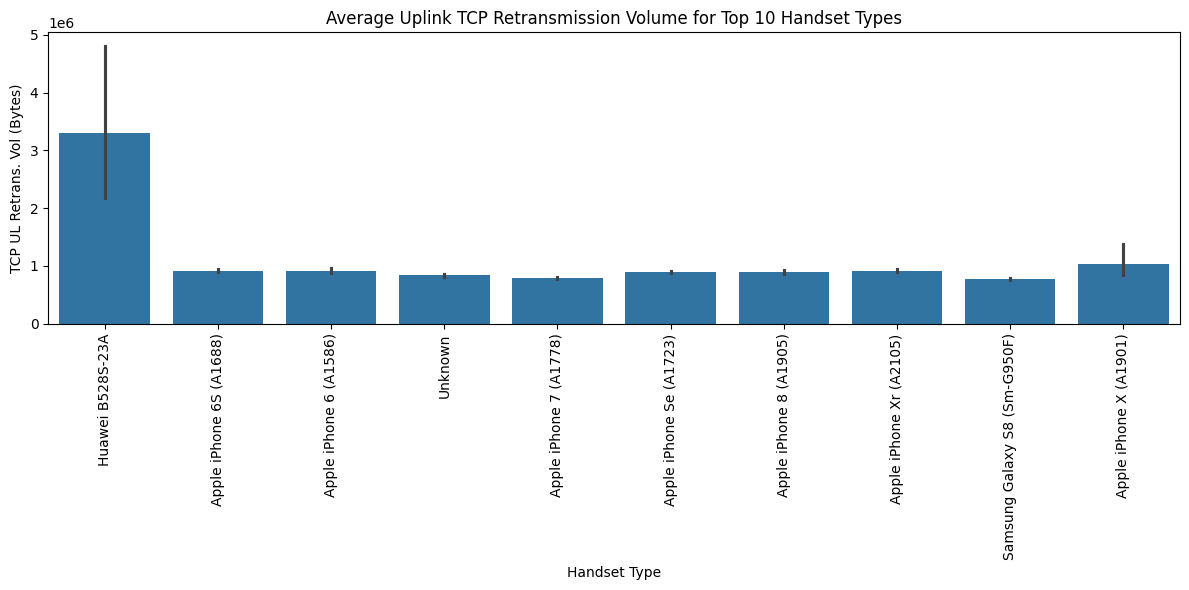

In [13]:
# Plot TCP retransmission
user_experience.plot_tcp_retransmission()

### K-Means Clustering

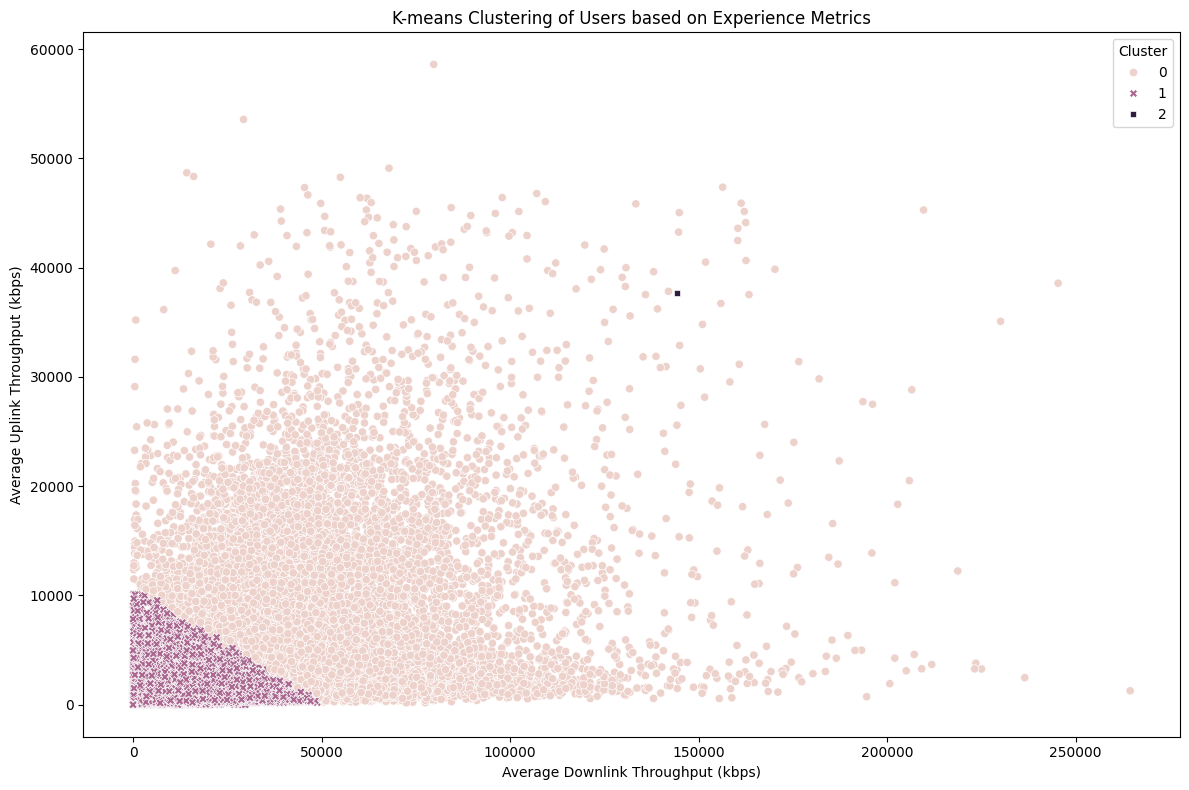

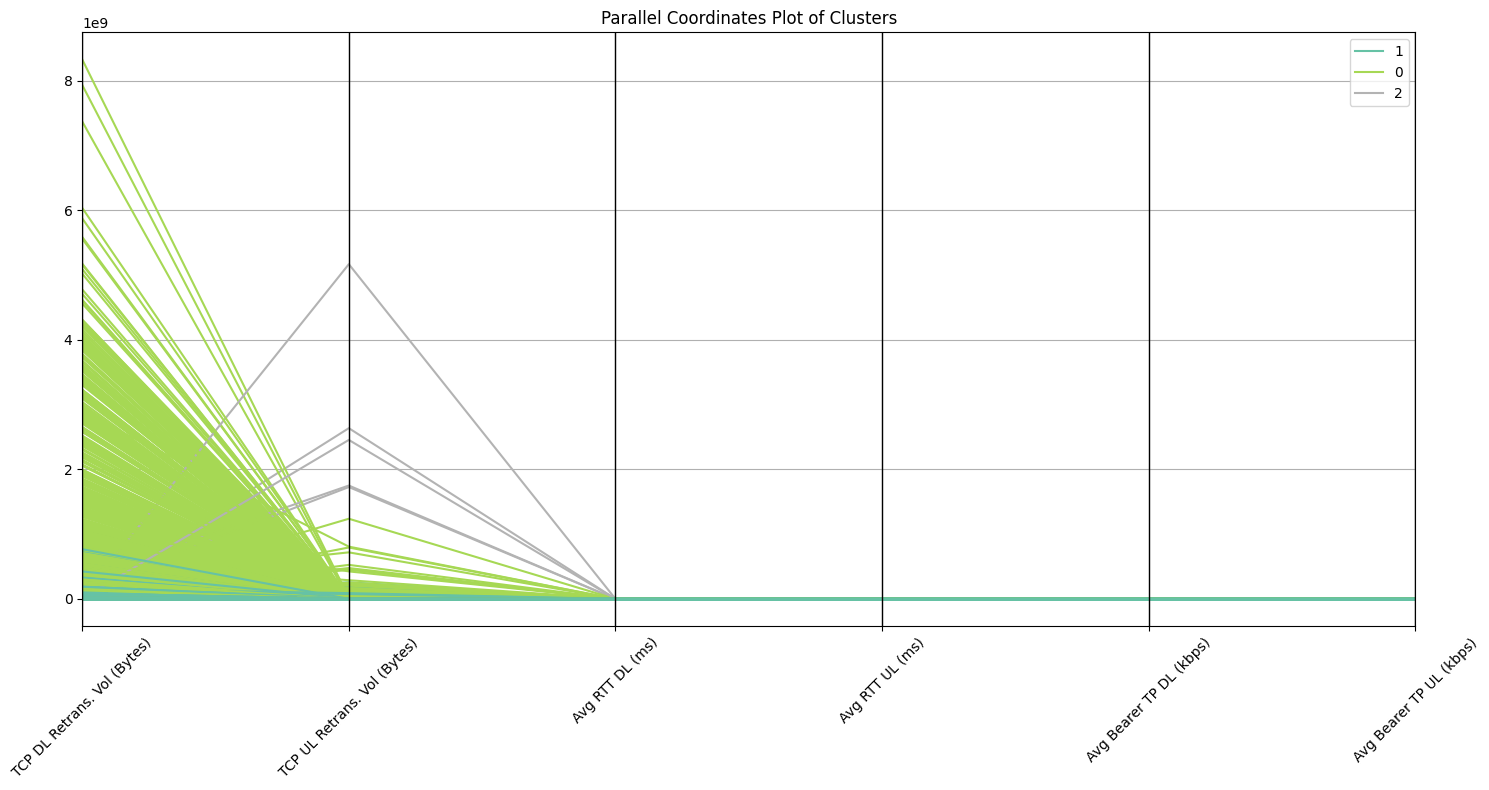

In [14]:
# Perform and plot k-means clustering
user_experience.plot_kmeans_results()